# 1.Data Preprocessing

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('anime.csv')
     

In [3]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df.shape

(12294, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()


anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(12017, 7)

In [11]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [12]:

df.info()
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [13]:
df.describe()

,anime_id,rating,members
count,12017.000000,12017.000000,1.201700e+04
mean,13638.001165,6.478264,1.834888e+04
std,11231.076675,1.023857,5.537250e+04
min,1.000000,1.670000,1.200000e+01
25%,3391.000000,5.890000,2.250000e+02
50%,9959.000000,6.570000,1.552000e+03
75%,23729.000000,7.180000,9.588000e+03
max,34519.000000,10.000000,1.013917e+06


In [14]:

df.nunique()

anime_id    12017
name        12015
genre        3229
type            6
episodes      187
rating        598
members      6596
dtype: int64

In [15]:
df['genre'].value_counts()

Hentai                                                   816
Comedy                                                   521
Music                                                    297
Kids                                                     197
Comedy, Slice of Life                                    174
                                                        ... 
Adventure, Comedy, Horror, Shounen, Supernatural           1
Comedy, Harem, Romance, School, Seinen, Slice of Life      1
Comedy, Ecchi, Sci-Fi, Shounen                             1
Adventure, Shounen, Sports                                 1
Hentai, Slice of Life                                      1
Name: genre, Length: 3229, dtype: int64

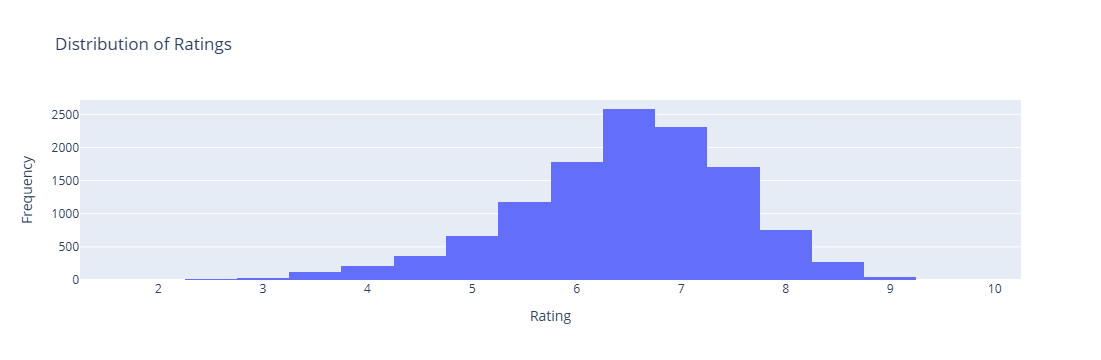

In [32]:
import plotly.express as px
fig = px.histogram(df, x='rating', nbins=20, title='Distribution of Ratings')
fig.update_layout(xaxis_title='Rating', yaxis_title='Frequency')
fig.show()

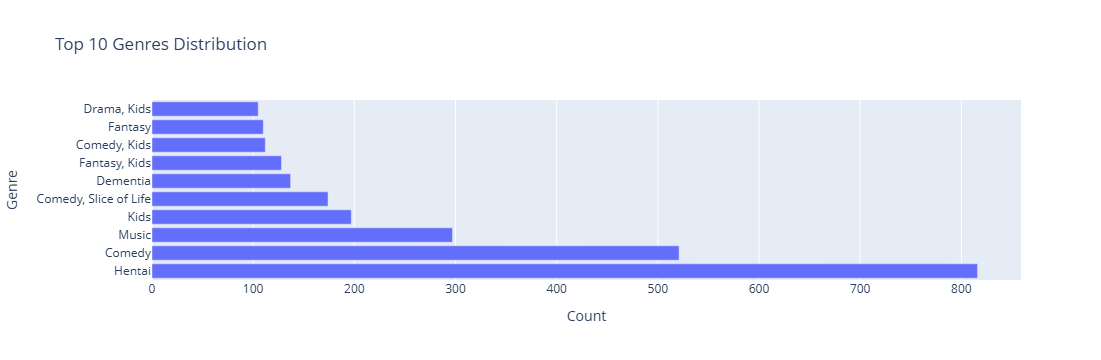

In [33]:
top_genres = df['genre'].value_counts().index[:10]
genre_counts = df['genre'].value_counts().head(10)

fig = px.bar(x=genre_counts, y=top_genres, orientation='h',
             labels={'x': 'Count', 'y': 'Genre'},
             title='Top 10 Genres Distribution')
fig.show()

# 2. Feature Extraction

In [17]:
genres = df['genre'].str.get_dummies(sep=', ')
df_numerical = pd.concat([df.drop('genre', axis=1), genres], axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['rating', 'members']
df_numerical[numerical_cols] = scaler.fit_transform(df_numerical[numerical_cols])

df_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,2.824474,3.292044,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,2.717032,14.002410,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,2.707265,1.732216,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,2.629126,11.833499,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51,2.619358,2.400518,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
import plotly.graph_objs as go
import plotly.express as px

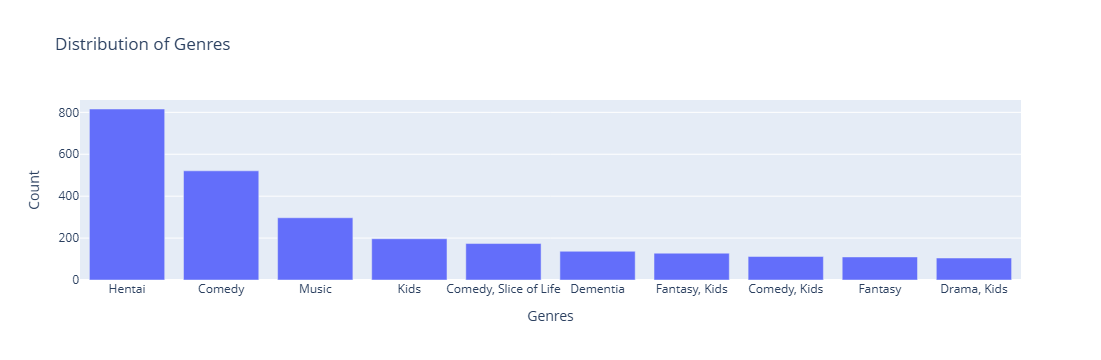

In [35]:
# Plot distribution of genres
fig = px.bar(x=genre_counts.index, y=genre_counts.values,
             labels={'x': 'Genres', 'y': 'Count'},
             title='Distribution of Genres')
fig.update_layout(xaxis={'categoryorder':'total descending'},
                  xaxis_title='Genres', yaxis_title='Count')
fig.show()

In [36]:
# Plot distribution of scaled numerical features
fig = go.Figure()

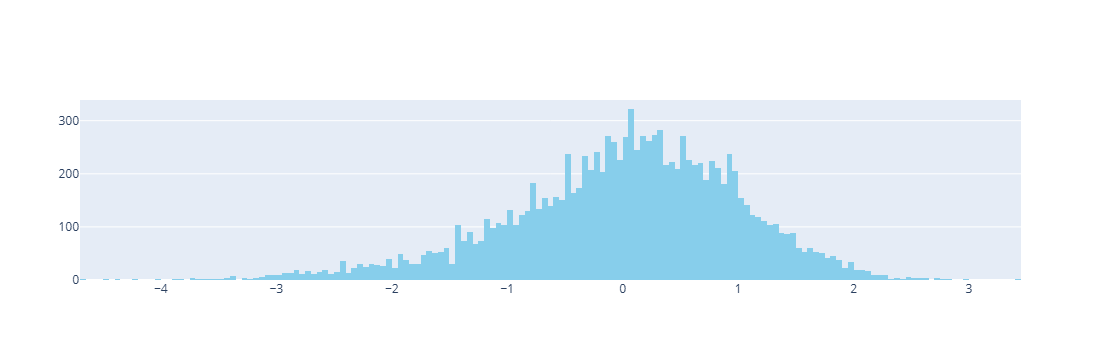

In [37]:
# Distribution of Ratings
fig.add_trace(go.Histogram(x=df_numerical['rating'],
                            marker_color='skyblue',
                            name='Rating'))

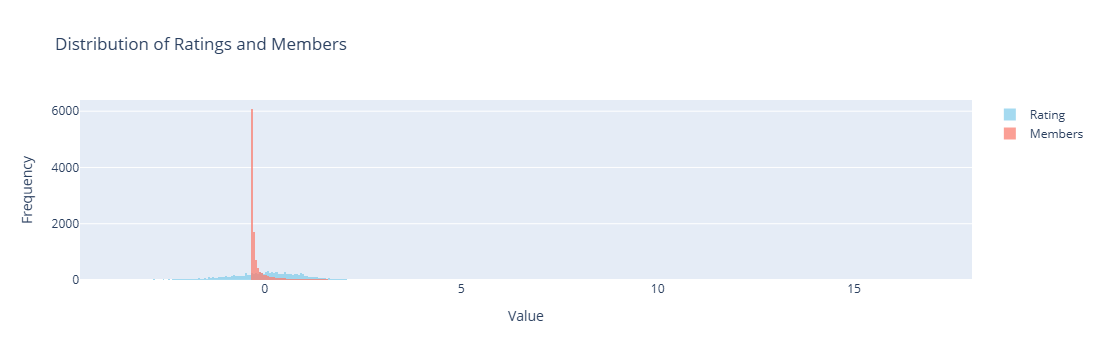

In [38]:
# Distribution of Members
fig.add_trace(go.Histogram(x=df_numerical['members'],
                            marker_color='salmon',
                            name='Members'))
fig.update_layout(title='Distribution of Ratings and Members',
                  xaxis_title='Value',
                  yaxis_title='Frequency',
                  barmode='overlay')
fig.update_traces(opacity=0.75)
fig.update_layout(showlegend=True)

fig.show()

# 3. Recommendation System

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_similar_anime(target_anime, threshold=0.5):
    # Find the row corresponding to the target anime
    target_row = df_numerical[df_numerical['name'] == target_anime].drop(['name', 'type'], axis=1)

    # Replace 'Unknown' values in 'episodes' column with NaN
    df_numerical['episodes'] = pd.to_numeric(df_numerical['episodes'], errors='coerce')

    # Drop rows with NaN values in 'episodes' column
    df_numerical.dropna(subset=['episodes'], inplace=True)

    # Compute cosine similarity between target anime and all other anime
    similarities = cosine_similarity(target_row, df_numerical.drop(['name', 'type'], axis=1))

    # Get indices of anime with similarity above threshold
    similar_anime_indices = np.where(similarities > threshold)[1]

    # Exclude the target anime itself from recommendations
    similar_anime_indices = similar_anime_indices[similar_anime_indices != target_row.index[0]]

    # Get names of recommended anime
    recommended_anime = df_numerical.iloc[similar_anime_indices]['name'].tolist()

    return recommended_anime

In [45]:
threshold_values = [0.2, 0.5, 0.9]
target_anime = 'Nana'

for threshold in threshold_values:
    recommended_anime = recommend_similar_anime(target_anime, threshold=threshold)

# Create a DataFrame to display the recommended anime
df_recommendations = pd.DataFrame(recommended_anime, columns=['Recommended Anime'])

In [46]:
# Add additional information
num_recommendations = len(recommended_anime)
value_counts = df_recommendations['Recommended Anime'].value_counts()
top_5_recommendations = value_counts.head(5)

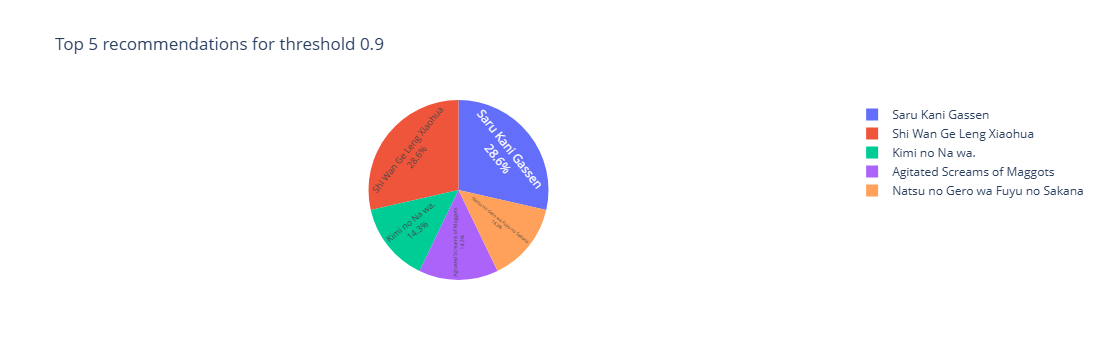


Recommendations for threshold 0.9:
Recommended anime similar to 'Nana':
                                       Recommended Anime
0                                         Kimi no Na wa.
1                       Fullmetal Alchemist: Brotherhood
2                                               Gintama°
3                                            Steins;Gate
4                                          Gintama&#039;
...                                                  ...
11790       Toushindai My Lover: Minami tai Mecha-Minami
11791                                        Under World
11792                     Violence Gekiga David no Hoshi
11793  Violence Gekiga Shin David no Hoshi: Inma Dens...
11794                   Yasuji no Pornorama: Yacchimae!!

[11795 rows x 1 columns]

Number of recommendations: 11795

Value counts of recommended anime:
Saru Kani Gassen                              2
Shi Wan Ge Leng Xiaohua                       2
Kimi no Na wa.                                1
Agi

In [47]:
# Create pie chart of the top 5 recommendations
fig = px.pie(names=top_5_recommendations.index, values=top_5_recommendations.values,title=f'Top 5 recommendations for threshold {threshold}',labels={'names': 'Anime', 'values': 'Count'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Display the information for the current threshold
print(f"\nRecommendations for threshold {threshold}:")
print("Recommended anime similar to '{}':".format(target_anime))
print(df_recommendations)
print("\nNumber of recommendations:", num_recommendations)
print("\nValue counts of recommended anime:")
print(value_counts)
print("\nTop 5 recommendations:")
print(top_5_recommendations)

# 4. Evaluation

In [23]:
pd.set_option('display.max_columns', None)
df_numerical.head()
     

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1.0,2.824474,3.292044,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.717032,14.002410,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51.0,2.707265,1.732216,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24.0,2.629126,11.833499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51.0,2.619358,2.400518,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [24]:
df_numerical.describe()

,anime_id,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
count,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000
mean,13404.150211,12.486729,0.006197,0.002928,0.232291,0.193829,0.006002,0.378952,0.020118,0.024260,0.166695,0.053001,0.187574,0.014370,0.026374,0.092899,0.066526,0.030431,0.004396,0.131023,0.062722,0.021809,0.078360,0.035080,0.070330,0.040744,0.033559,0.016399,0.019104,0.121386,0.012257,0.098394,0.171429,0.044801,0.049620,0.004565,0.140997,0.005241,0.099746,0.031784,0.044548,0.037616,0.083939,0.007270,0.008453,0.003128,0.003466
std,11110.087616,47.097131,0.995442,1.000023,0.422311,0.395313,0.077241,0.485147,0.140411,0.153863,0.372719,0.224045,0.390388,0.119017,0.160251,0.290304,0.249209,0.171778,0.066156,0.337440,0.242472,0.146066,0.268749,0.183991,0.255713,0.197705,0.180098,0.127010,0.136896,0.326589,0.110035,0.297859,0.376899,0.206876,0.217167,0.067411,0.348034,0.072207,0.299674,0.175431,0.206317,0.190274,0.277308,0.084955,0.091555,0.055840,0.058771
min,1.000000,1.000000,-4.696423,-0.331169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3326.250000,1.000000,-0.572139,-0.327191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9820.500000,2.000000,0.089602,-0.302679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23302.500000,12.000000,0.695181,-0.153817,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34519.000000,1818.000000,3.439820,17.980218,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

In [25]:
# Calculate mean and standard deviation for episodes, rating, and members
mean_episodes = 12.486729
mean_rating = 0.006197
mean_members = 0.002928

std_dev_episodes = np.std(df_numerical['episodes'])
std_dev_rating = np.std(df_numerical['rating'])
std_dev_members = np.std(df_numerical['members'])

Threshold values:
Episodes threshold: 59.58186967572618
Rating threshold: 1.0015968731095757
Members threshold: 1.0029082457034983


In [48]:
# Set threshold values
episodes_threshold = mean_episodes + std_dev_episodes
rating_threshold = mean_rating + std_dev_rating
members_threshold = mean_members + std_dev_members

print("Threshold values:")
print("Episodes threshold:", episodes_threshold)
print("Rating threshold:", rating_threshold)
print("Members threshold:", members_threshold)

Threshold values:
Episodes threshold: 59.58186967572618
Rating threshold: 1.0015968731095757
Members threshold: 1.0029082457034983


In [49]:
# Define threshold values for ratings, episodes, and members
rating_threshold = 1.001596873109577
episodes_threshold = 59.58186967572351
members_threshold = 1.0029082457034968

In [50]:
# Create binary target variable based on thresholds
df_numerical['liked'] = ((df_numerical['rating'] >= rating_threshold) |
                         (df_numerical['episodes'] >= episodes_threshold) |
                         (df_numerical['members'] >= members_threshold)).astype(int)

In [51]:
# Display the updated dataset with the new 'liked' column
df_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,liked
0,32281,Kimi no Na wa.,Movie,1.0,2.824474,3.292044,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.717032,14.002410,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,TV,51.0,2.707265,1.732216,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,TV,24.0,2.629126,11.833499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9969,Gintama&#039;,TV,51.0,2.619358,2.400518,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [27]:
print(df_numerical['liked'].value_counts())

0    9684
1    2146
Name: liked, dtype: int64


In [52]:
# Calculate value counts for the 'liked' column
liked_counts = df_numerical['liked'].value_counts()

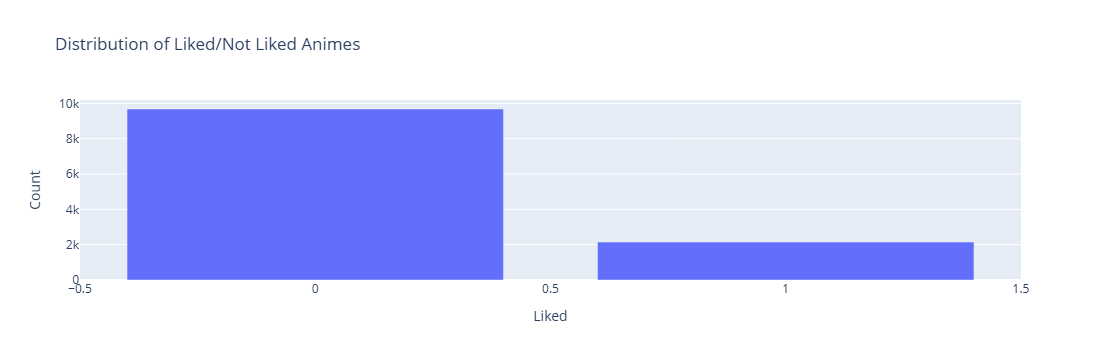

In [53]:
# Plot bar plot
fig = px.bar(x=liked_counts.index, y=liked_counts.values,
             labels={'x': 'Liked', 'y': 'Count'},
             title='Distribution of Liked/Not Liked Animes')
fig.update_layout(xaxis={'categoryorder':'total descending'},
                  xaxis_title='Liked', yaxis_title='Count')
fig.show()

In [29]:
from sklearn.model_selection import train_test_split
X = df_numerical.drop(['name', 'type','anime_id'], axis=1)  # Features
y = df_numerical['liked']  # Target variable

Shape of X_train: (9464, 47)
Shape of X_test: (2366, 47)
Shape of y_train: (9464,)
Shape of y_test: (2366,)


In [54]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9464, 47)
Shape of X_test: (2366, 47)
Shape of y_train: (9464,)
Shape of y_test: (2366,)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score     

In [57]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# Train a binary classification model (logistic regression) using the scaled training set
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing set
y_pred = model.predict(X_test_scaled)

In [59]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [60]:
from sklearn.metrics import accuracy_score

In [61]:
# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


#### 1. Can you explain the difference between user-based and item-based collaborative filtering?
Collaborative filtering is a popular technique used in recommendation systems, where the goal is to recommend items to users based on the preferences of other users or items. There are two main types of collaborative filtering: User-Based and Item-Based.

User-Based Collaborative Filtering (UBCF):
How it works: In user-based collaborative filtering, the system recommends items to a user based on the preferences of other users who are similar to them.
Similarity Measurement: The key idea is to find users who have similar tastes or preferences by comparing their historical ratings or interactions with items. Typically, similarity is measured using metrics like cosine similarity, Pearson correlation, or Euclidean distance.
Recommendation Generation: Once similar users (neighbors) are identified, the system recommends items that those neighbors have liked or rated highly but that the target user has not yet interacted with.
In item-based collaborative filtering, the system recommends items based on the similarity between the items themselves, rather than between users.
Similarity Measurement: The idea is to identify items that are similar to those the user has already interacted with. This can be done by looking at patterns of co-occurrence or similarity in ratings between items (e.g., users who liked item X also liked item Y).
Recommendation Generation: Once similar items are identified, the system recommends items that are similar to those the user has liked or interacted with in the past.

#### 2. What is collaborative filtering, and how does it work
Collaborative Filtering (CF) is a technique used in recommendation systems to predict the interests or preferences of a user by collecting preferences or ratings from many users. The assumption is that if users agree in the past, they will agree in the future about which items they like or dislike.

How Collaborative Filtering Works:
Collaborative filtering relies on the idea of leveraging the preferences of other users (or items) to make recommendations. The process typically involves two main steps:

Finding Similar Users or Items:
User-Based Collaborative Filtering: In this approach, the system identifies users whose preferences are similar to the target user. The similarity can be calculated using measures like Pearson correlation, cosine similarity, or Jaccard similarity.
Item-Based Collaborative Filtering: Here, the system identifies items that are similar to those the user has already interacted with, using similarity measures between items based on users' ratings or interactions.
Generating Recommendations:
Once the system has identified similar users or items, it generates recommendations based on the preferences of the neighbors (in the case of user-based CF) or the similarity of items (in the case of item-based CF). The system suggests items that the target user has not yet interacted with but that are highly rated or liked by similar users or closely related items
Types of Collaborative Filtering:
Memory-Based Collaborative Filtering: This approach uses the entire user-item interaction matrix to find similarities and make recommendations. Both user-based and item-based collaborative filtering are considered memory-based methods, as they require large amounts of data to find similarities.
Example: In a movie recommendation system, user-based CF might recommend movies that users with similar tastes have enjoyed, while item-based CF might recommend movies that are similar to those the user has liked.
Model-Based Collaborative Filtering: This approach uses machine learning algorithms (e.g., matrix factorization, Singular Value Decomposition (SVD), or deep learning) to learn patterns from the user-item interaction matrix and make predictions.